<a href="https://colab.research.google.com/github/Mo967tech/object-detection/blob/main/w3_session3_DL_NTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object detection**

# **Load important libraries**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# **preprocess data**

In [2]:
def generate_bounding_box(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    ymin, ymax = np.where(rows)[0][[0, -1]]
    xmin, xmax = np.where(cols)[0][[0, -1]]

    # Normalize the coordinates to be between 0 and 1
    ymin, ymax = ymin / 28.0, ymax / 28.0
    xmin, xmax = xmin / 28.0, xmax / 28.0

    width = xmax - xmin
    height = ymax - ymin

    return [xmin, ymin, width, height]

def preprocess_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    # Generate synthetic bounding box coordinates
    y_train_boxes = np.array([generate_bounding_box(img) for img in X_train])
    y_test_boxes = np.array([generate_bounding_box(img) for img in X_test])

    return (X_train, y_train_boxes), (X_test, y_test_boxes)

(X_train, y_train_boxes), (X_test, y_test_boxes) = preprocess_mnist()

11490434/11490434 [==============================] - 0s 0us/step


# **create model and train it**

In [3]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(4)  # Predict 4 values: x, y, width, height
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

model = create_model()
history = model.fit(X_train, y_train_boxes, epochs=10, batch_size=32, validation_data=(X_test, y_test_boxes))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 9.5303e-04 - val_loss: 3.6185e-04
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 3.3435e-04 - val_loss: 2.4564e-04
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.4689e-04 - val_loss: 2.1847e-04
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.9877e-04 - val_loss: 1.4757e-04
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5907e-04 - val_loss: 1.5299e-04
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.4314e-04 - val_loss: 1.7038e-04
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2502e-04 - val_loss: 1.0010e-04
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.1438e-04 - val_loss: 9.8436e-05
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.0654e-04 - val_loss: 8.5715e-05
E

# **evaluate model**

In [4]:
print(model.evaluate(X_test, y_test_boxes))
model.summary()

313/313 [==============================] - 1s 3ms/step - loss: 7.8536e-05
7.853554416215047e-05
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                          

# **plot predicted boundry box and actual boundry box**

1/1 [==============================] - 0s 93ms/step


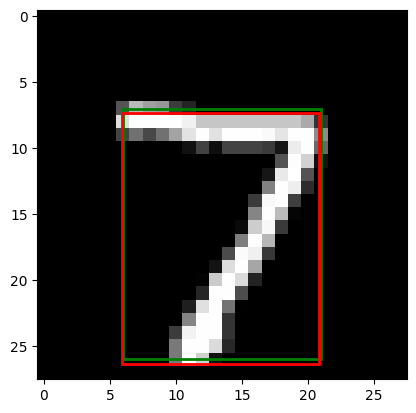

1/1 [==============================] - 0s 24ms/step


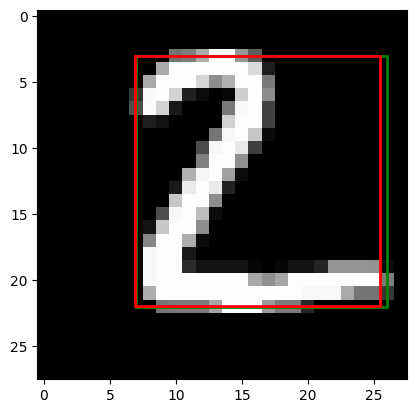

1/1 [==============================] - 0s 24ms/step


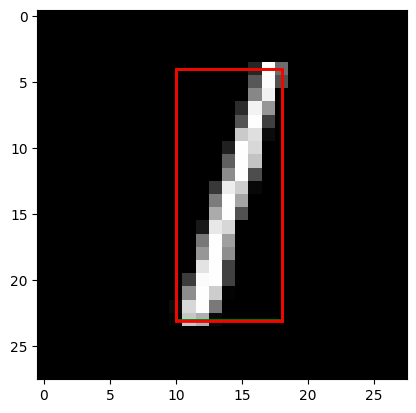

1/1 [==============================] - 0s 25ms/step


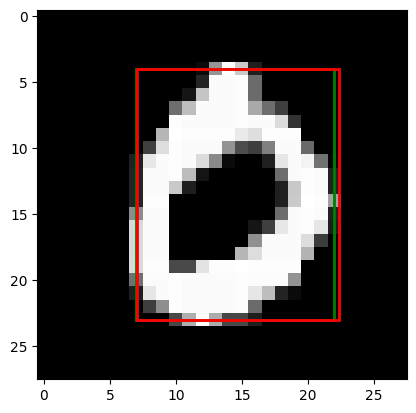

1/1 [==============================] - 0s 25ms/step


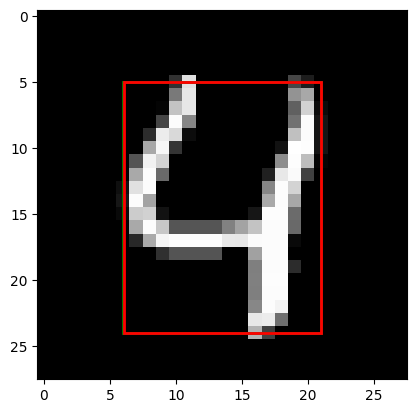

1/1 [==============================] - 0s 24ms/step


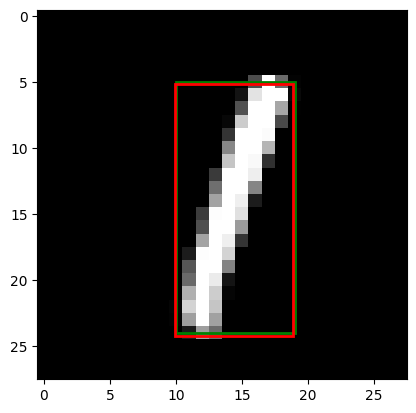

1/1 [==============================] - 0s 23ms/step


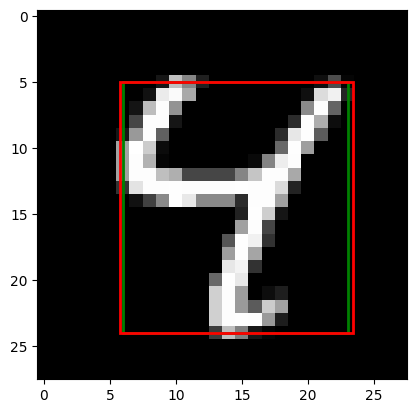

1/1 [==============================] - 0s 24ms/step


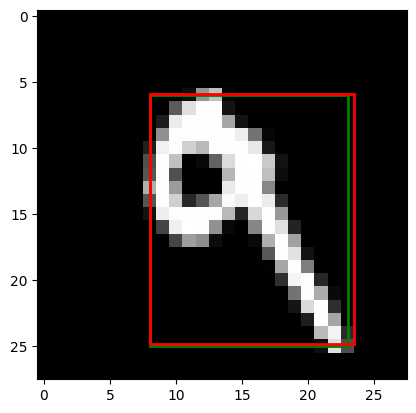

1/1 [==============================] - 0s 24ms/step


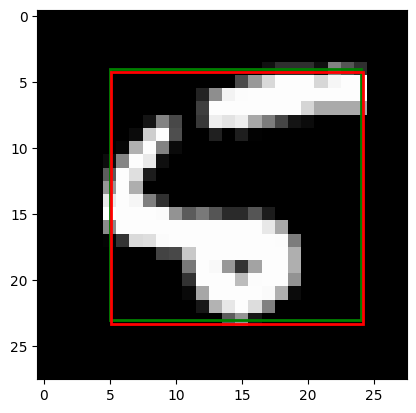

1/1 [==============================] - 0s 25ms/step


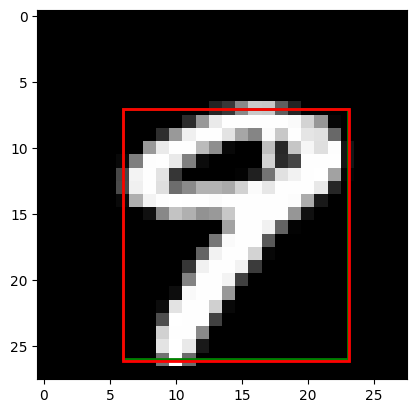

In [5]:
def plot_bounding_box(img, true_box, pred_box):
  plt.imshow(img.squeeze(), cmap='gray')
  plt.gca().add_patch(plt.Rectangle((true_box[0]*28, true_box[1]*28), true_box[2]*28, true_box[3]*28,
                                    fill=False, edgecolor='green', linewidth=2))
  plt.gca().add_patch(plt.Rectangle((pred_box[0]*28, pred_box[1]*28), pred_box[2]*28, pred_box[3]*28,
                                    fill=False, edgecolor='red', linewidth=2))
  plt.show()

for i in range(10):
  img = X_test[i]
  true_box = y_test_boxes[i]
  pred_box = model.predict(np.expand_dims(img, axis=0))[0]
  plot_bounding_box(img, true_box, pred_box)
